In [1]:
%load_ext dotenv
%dotenv 

In [2]:
from pymongo import MongoClient
import os
import pandas as pd

In [3]:
from bson import json_util, ObjectId
import json

In [4]:
def mongo_to_dataframe(mongo_data):

        sanitized = json.loads(json_util.dumps(mongo_data))
        normalized = pd.json_normalize(sanitized)
        df = pd.DataFrame(normalized)

        return df

In [5]:
mongo_conn = MongoClient(os.environ["MONGO_CONN"])
db = mongo_conn.twitter
sampled_users_collection = db.sampled_users_collection

In [6]:
projection = {"_id": False, "next_token": False} # exclude these fields from the result
cursor = sampled_users_collection.find({}, projection)
df = mongo_to_dataframe(list(cursor))

In [7]:
df["created_at"] = pd.to_datetime(df["created_at"])
df["RT_ratio"] = df.num_RT_tweets / df.num_pulled_tweets

In [8]:
df.head()

,id,username,created_at,tweet_count,error_or_no_access,num_pulled_tweets,num_pulled_mentions,num_RT_tweets,majority_lang,bot_score.cap.english,...,bot_score.raw_scores.english.spammer,bot_score.raw_scores.universal.astroturf,bot_score.raw_scores.universal.fake_follower,bot_score.raw_scores.universal.financial,bot_score.raw_scores.universal.other,bot_score.raw_scores.universal.overall,bot_score.raw_scores.universal.self_declared,bot_score.raw_scores.universal.spammer,bot_score,RT_ratio
0,1386498869186502660,TerminatusX,2021-04-26 01:54:31+00:00,12432,False,199.0,0.0,107.0,en,0.797076,...,0.30,0.22,0.76,0.03,0.85,0.85,0.85,0.41,NaN,0.537688
1,1597654711011876868,LuciferVtuber__,2022-11-29 18:12:32+00:00,940,True,NaN,NaN,NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1461333578764230657,KeithDa78355606,2021-11-18 14:31:52+00:00,2291,False,200.0,100.0,10.0,en,0.797061,...,0.27,0.05,0.61,0.08,0.86,0.89,0.89,0.40,NaN,0.050000
3,2550669008,riverlevel_0885,2014-06-06 18:18:45+00:00,6988,False,200.0,1.0,0.0,en,0.874858,...,0.65,0.10,0.63,0.13,0.96,0.96,0.93,0.63,NaN,0.000000
4,1510071482314944512,Wabuuu2236,2022-04-02 01:49:05+00:00,250,False,197.0,85.0,4.0,en,0.816204,...,0.37,0.06,0.60,0.16,0.88,0.93,0.93,0.44,NaN,0.020305


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26340 entries, 0 to 26339
Data columns (total 27 columns):
 #   Column                                        Non-Null Count  Dtype              
---  ------                                        --------------  -----              
 0   id                                            26340 non-null  object             
 1   username                                      26340 non-null  object             
 2   created_at                                    26340 non-null  datetime64[ns, UTC]
 3   tweet_count                                   26340 non-null  int64              
 4   error_or_no_access                            26340 non-null  bool               
 5   num_pulled_tweets                             24258 non-null  float64            
 6   num_pulled_mentions                           19375 non-null  float64            
 7   num_RT_tweets                                 19375 non-null  float64            
 8   majority_lang   

In [10]:
subjects_condition = (df["error_or_no_access"] == False) & (df["num_pulled_tweets"] > 0) & (df["majority_lang"] == "en")
subjects_df = df[subjects_condition]

In [11]:
subjects_df.head()

,id,username,created_at,tweet_count,error_or_no_access,num_pulled_tweets,num_pulled_mentions,num_RT_tweets,majority_lang,bot_score.cap.english,...,bot_score.raw_scores.english.spammer,bot_score.raw_scores.universal.astroturf,bot_score.raw_scores.universal.fake_follower,bot_score.raw_scores.universal.financial,bot_score.raw_scores.universal.other,bot_score.raw_scores.universal.overall,bot_score.raw_scores.universal.self_declared,bot_score.raw_scores.universal.spammer,bot_score,RT_ratio
0,1386498869186502660,TerminatusX,2021-04-26 01:54:31+00:00,12432,False,199.0,0.0,107.0,en,0.797076,...,0.30,0.22,0.76,0.03,0.85,0.85,0.85,0.41,NaN,0.537688
2,1461333578764230657,KeithDa78355606,2021-11-18 14:31:52+00:00,2291,False,200.0,100.0,10.0,en,0.797061,...,0.27,0.05,0.61,0.08,0.86,0.89,0.89,0.40,NaN,0.050000
3,2550669008,riverlevel_0885,2014-06-06 18:18:45+00:00,6988,False,200.0,1.0,0.0,en,0.874858,...,0.65,0.10,0.63,0.13,0.96,0.96,0.93,0.63,NaN,0.000000
4,1510071482314944512,Wabuuu2236,2022-04-02 01:49:05+00:00,250,False,197.0,85.0,4.0,en,0.816204,...,0.37,0.06,0.60,0.16,0.88,0.93,0.93,0.44,NaN,0.020305
5,1594142802547441665,YungShitBird,2022-11-20 01:37:25+00:00,1269,False,200.0,100.0,11.0,en,0.796828,...,0.30,0.09,0.52,0.12,0.71,0.81,0.81,0.34,NaN,0.055000


In [12]:
condition = (df["error_or_no_access"] == False) & (df["num_pulled_tweets"] == 0)
users_df = df[condition]
users_df.id.count()

4883

In [13]:
subjects_df.id.count()

17978

# RT ratio

array([[<AxesSubplot: title={'center': 'RT_ratio'}>]], dtype=object)

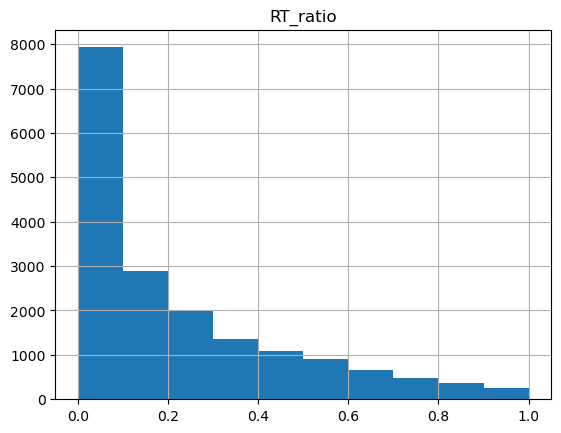

In [14]:
pd.plotting.hist_frame(subjects_df, "RT_ratio")

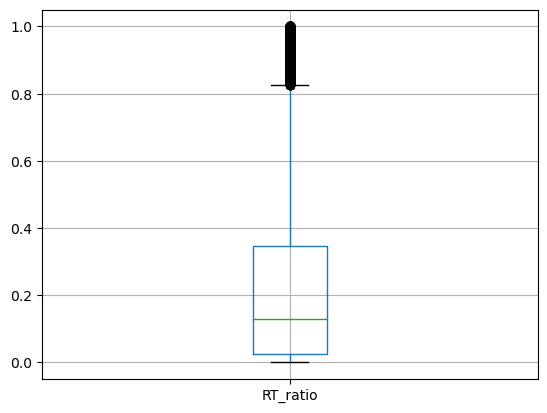

In [15]:
ax = pd.plotting.boxplot(subjects_df, "RT_ratio")

In [16]:
subjects_df.RT_ratio.describe()

count    17978.000000
mean         0.220021
std          0.240825
min          0.000000
25%          0.025000
50%          0.130000
75%          0.345000
max          1.000000
Name: RT_ratio, dtype: float64

# Bot scores

## CAP score

array([[<AxesSubplot: title={'center': 'bot_score.cap.english'}>]],
      dtype=object)

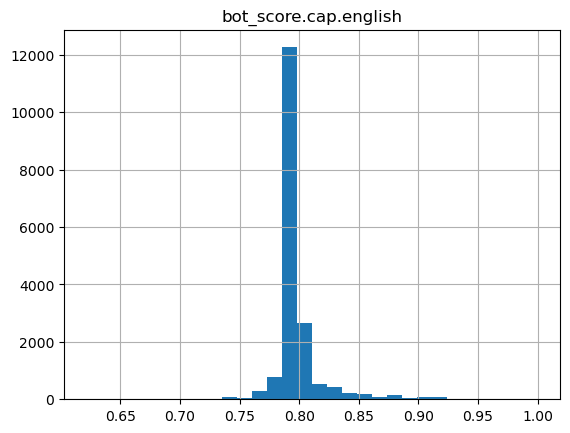

In [17]:
pd.plotting.hist_frame(subjects_df, "bot_score.cap.english", bins=30)

## Overall score

array([[<AxesSubplot: title={'center': 'bot_score.raw_scores.english.overall'}>]],
      dtype=object)

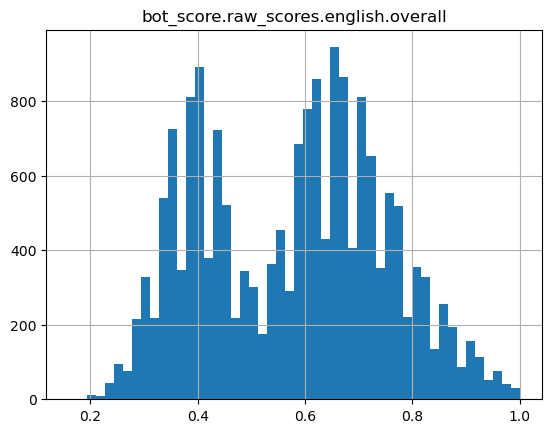

In [18]:
pd.plotting.hist_frame(subjects_df, "bot_score.raw_scores.english.overall", bins=50)

<AxesSubplot: >

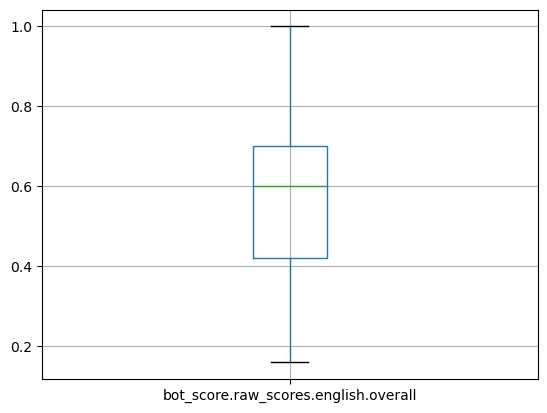

In [19]:
pd.plotting.boxplot(subjects_df, "bot_score.raw_scores.english.overall")

In [20]:
subjects_df["bot_score.raw_scores.english.overall"].describe()

count    17978.000000
mean         0.578693
std          0.170450
min          0.160000
25%          0.420000
50%          0.600000
75%          0.700000
max          1.000000
Name: bot_score.raw_scores.english.overall, dtype: float64

# Low score users

In [21]:
score_threshold = 0.5
low_score_selection = (subjects_df["bot_score.raw_scores.english.overall"] < score_threshold) 
# rt_ratio_threshold = 0.8
# low_rt_ratio_selection = (subjects_df["RT_ratio"] < rt_ratio_threshold) 

subjects_df["low_score"] = low_score_selection
# subjects_df["low_score"] = low_score_selection & low_rt_ratio_selection

/var/folders/dd/2_blbb9s3nn8bw_ty17bwmdc0002l2/T/ipykernel_20879/1178835442.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subjects_df["low_score"] = low_score_selection


In [22]:
subjects_df.head()

,id,username,created_at,tweet_count,error_or_no_access,num_pulled_tweets,num_pulled_mentions,num_RT_tweets,majority_lang,bot_score.cap.english,...,bot_score.raw_scores.universal.astroturf,bot_score.raw_scores.universal.fake_follower,bot_score.raw_scores.universal.financial,bot_score.raw_scores.universal.other,bot_score.raw_scores.universal.overall,bot_score.raw_scores.universal.self_declared,bot_score.raw_scores.universal.spammer,bot_score,RT_ratio,low_score
0,1386498869186502660,TerminatusX,2021-04-26 01:54:31+00:00,12432,False,199.0,0.0,107.0,en,0.797076,...,0.22,0.76,0.03,0.85,0.85,0.85,0.41,NaN,0.537688,False
2,1461333578764230657,KeithDa78355606,2021-11-18 14:31:52+00:00,2291,False,200.0,100.0,10.0,en,0.797061,...,0.05,0.61,0.08,0.86,0.89,0.89,0.40,NaN,0.050000,True
3,2550669008,riverlevel_0885,2014-06-06 18:18:45+00:00,6988,False,200.0,1.0,0.0,en,0.874858,...,0.10,0.63,0.13,0.96,0.96,0.93,0.63,NaN,0.000000,False
4,1510071482314944512,Wabuuu2236,2022-04-02 01:49:05+00:00,250,False,197.0,85.0,4.0,en,0.816204,...,0.06,0.60,0.16,0.88,0.93,0.93,0.44,NaN,0.020305,False
5,1594142802547441665,YungShitBird,2022-11-20 01:37:25+00:00,1269,False,200.0,100.0,11.0,en,0.796828,...,0.09,0.52,0.12,0.71,0.81,0.81,0.34,NaN,0.055000,True


In [23]:
subjects_df.low_score.value_counts()

False    11488
True      6490
Name: low_score, dtype: int64

## Number of tweets

array([<AxesSubplot: title={'center': 'False'}>,
       <AxesSubplot: title={'center': 'True'}>], dtype=object)

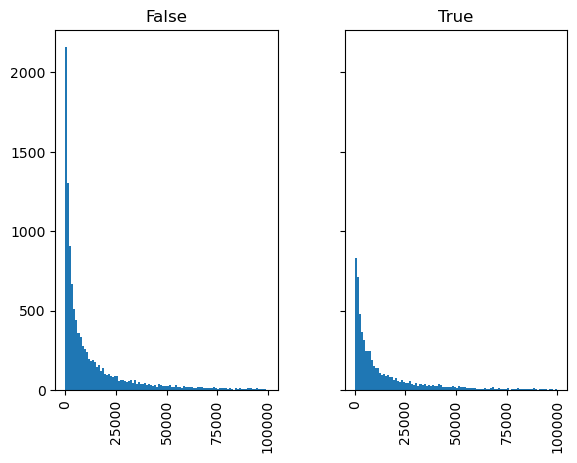

In [24]:
pd.plotting.hist_frame(subjects_df, "tweet_count", bins=100, by="low_score", sharey=True, range=(0, 100000))

array([<AxesSubplot: title={'center': 'False'}>,
       <AxesSubplot: title={'center': 'True'}>], dtype=object)

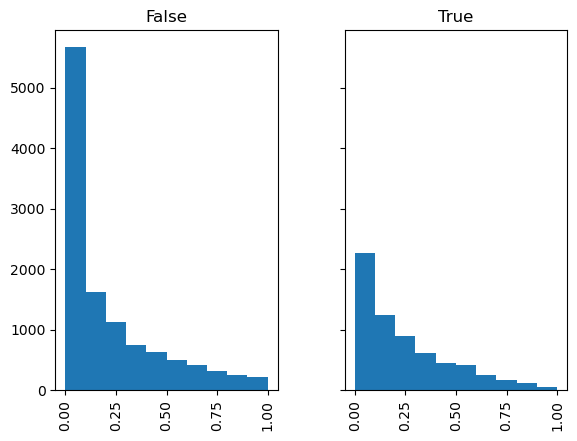

In [25]:
pd.plotting.hist_frame(subjects_df, "RT_ratio", by="low_score", sharey=True)

array([<AxesSubplot: title={'center': 'False'}>,
       <AxesSubplot: title={'center': 'True'}>], dtype=object)

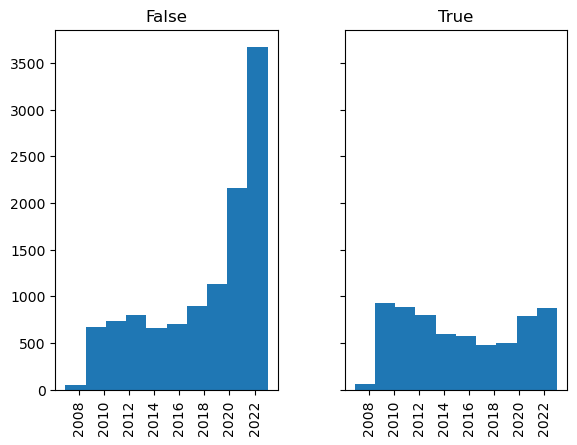

In [26]:
pd.plotting.hist_frame(subjects_df, "created_at", by="low_score", sharey=True)

array([<AxesSubplot: title={'center': 'False'}>,
       <AxesSubplot: title={'center': 'True'}>], dtype=object)

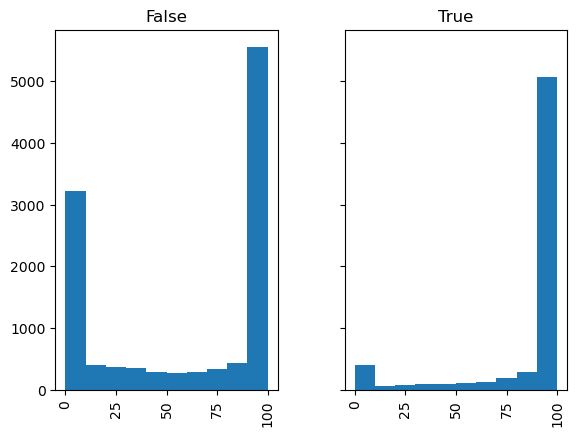

In [27]:
pd.plotting.hist_frame(subjects_df, "num_pulled_mentions", by="low_score", sharey=True)

array([<AxesSubplot: title={'center': 'False'}>,
       <AxesSubplot: title={'center': 'True'}>], dtype=object)

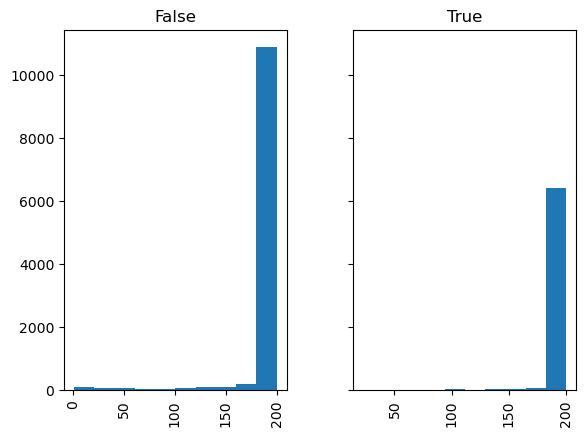

In [28]:
pd.plotting.hist_frame(subjects_df, "num_pulled_tweets", by="low_score", sharey=True)

array([<AxesSubplot: title={'center': 'False'}>,
       <AxesSubplot: title={'center': 'True'}>], dtype=object)

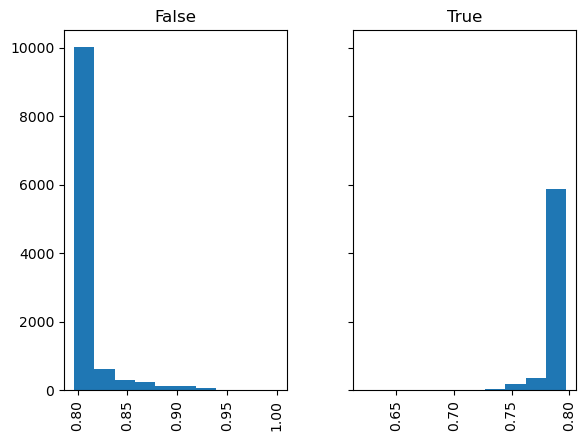

In [29]:
pd.plotting.hist_frame(subjects_df, "bot_score.cap.english", by="low_score", sharey=True, stacked=True, histtype="barstacked")

# Choosing our criteria
Out of the sampled users, we wish to keep the following:
- users who didn't get suspended
- users who have tweeted (incl. RTs) at least 500 times
- users whose majority language is english
- users for whom we have num_pulled_tweets > 0
- users whose RT ratio is < 0.5
- users whose bot score is < 0.5

In [30]:
df.id.count()

26340

In [31]:
not_suspended = df["error_or_no_access"] == False
min_tweets = df["tweet_count"] > 500
en_majority = df["majority_lang"] == "en"
have_tweets = df["num_pulled_tweets"] > 0
RT_acceptable = df["RT_ratio"] < 0.8
bot_score_acceptable = df["bot_score.raw_scores.english.overall"] < 0.5

In [32]:
filtered_df = df[not_suspended & min_tweets & en_majority & have_tweets & RT_acceptable & bot_score_acceptable]

In [33]:
filtered_df.tail()

,id,username,created_at,tweet_count,error_or_no_access,num_pulled_tweets,num_pulled_mentions,num_RT_tweets,majority_lang,bot_score.cap.english,...,bot_score.raw_scores.english.spammer,bot_score.raw_scores.universal.astroturf,bot_score.raw_scores.universal.fake_follower,bot_score.raw_scores.universal.financial,bot_score.raw_scores.universal.other,bot_score.raw_scores.universal.overall,bot_score.raw_scores.universal.self_declared,bot_score.raw_scores.universal.spammer,bot_score,RT_ratio
26329,1422996196763836417,FlorianBr332,2021-08-04 19:02:00+00:00,1942,False,200.0,100.0,0.0,en,0.794672,...,0.17,0.04,0.48,0.10,0.91,0.91,0.91,0.27,NaN,0.000
26334,16227630,itsthereal,2008-09-10 20:19:13+00:00,90666,False,200.0,100.0,57.0,en,0.738478,...,0.18,0.07,0.38,0.04,0.69,0.76,0.76,0.23,NaN,0.285
26335,1290617112894021632,taeteluv_,2020-08-04 11:54:47+00:00,14799,False,200.0,0.0,42.0,en,0.789229,...,0.24,0.03,0.57,0.01,0.78,0.78,0.74,0.23,NaN,0.210
26336,1112435712698155008,Cheebaku,2019-03-31 19:25:16+00:00,2644,False,200.0,100.0,20.0,en,0.795256,...,0.22,0.04,0.55,0.02,0.81,0.90,0.90,0.33,NaN,0.100
26339,65062846,DoriLacamu,2009-08-12 15:24:47+00:00,1184,False,200.0,68.0,4.0,en,0.796410,...,0.27,0.01,0.54,0.02,0.49,0.44,0.33,0.25,NaN,0.020


### **There are only 2836 users out of the 12373 sampled ones that fit this criteria!!!!**

In [34]:
filtered_df.id.count()

5946

And the most restrictive condition is the bot score...

In [35]:
condition_names = ["not_suspended", "min_tweets", "en_majority", "have_tweets", "RT_acceptable", "bot_score_acceptable"]
conditions = [not_suspended, min_tweets, en_majority, have_tweets, RT_acceptable, bot_score_acceptable]
for name, condition in zip(condition_names, conditions):
    res_df = df[condition]
    print("Number of users that fulfill %s: %d" % (name, res_df.id.count()))

Number of users that fulfill not_suspended: 24258
Number of users that fulfill min_tweets: 23924
Number of users that fulfill en_majority: 17978
Number of users that fulfill have_tweets: 19375
Number of users that fulfill RT_acceptable: 18680
Number of users that fulfill bot_score_acceptable: 6542


In [36]:
filtered_df = df[not_suspended & min_tweets & en_majority & have_tweets & bot_score_acceptable]
filtered_df.id.count()

6108

# Validity of bot score

Current bot score: max() over all bot categories (`astroturf`, `financial`, `fake follower`, `spammer`, `self-declared`, `other`)

Observation: it seems like the `other` category is consistently high for all users, and thus may be the driving factor for all the high bot scores.

**Q1:** In what % of scores is `other` category the largest?

**Q2:** If we only look at the `other` score, how does that change the distribution of bot scores?

## Overall score vs. Other score

array([[<AxesSubplot: title={'center': 'bot_score.raw_scores.english.overall'}>],
       [<AxesSubplot: title={'center': 'bot_score.raw_scores.english.other'}>]],
      dtype=object)

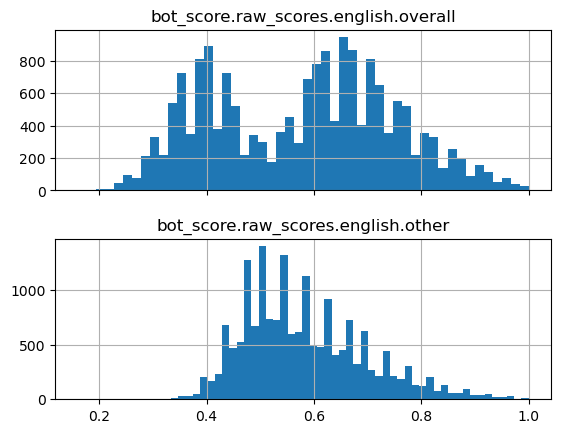

In [37]:
pd.plotting.hist_frame(subjects_df, ["bot_score.raw_scores.english.overall", "bot_score.raw_scores.english.other"], bins=50, sharex=True, layout=(2,1))

## Scores ranked based on max

In [38]:
from collections import Counter

In [39]:
scores = ["astroturf", "financial", "fake_follower", "spammer", "self_declared", "other"]
score_name = "bot_score.raw_scores.english.%s"

matches_overall = []

for idx, subject in subjects_df.iterrows():
    has_match = False
    overall = subject["bot_score.raw_scores.english.overall"]
    for s in scores:
        score = subject[score_name % s]
        if score == overall:
            matches_overall.append(s)
            has_match = True
    if not has_match:
        print(subject)

ranked_scores = Counter(matches_overall)

id                                                    1594142802547441665
username                                                     YungShitBird
created_at                                      2022-11-20 01:37:25+00:00
tweet_count                                                          1269
error_or_no_access                                                  False
num_pulled_tweets                                                   200.0
num_pulled_mentions                                                 100.0
num_RT_tweets                                                        11.0
majority_lang                                                          en
bot_score.cap.english                                            0.796828
bot_score.cap.universal                                          0.822113
bot_score.raw_scores.english.astroturf                               0.03
bot_score.raw_scores.english.fake_follower                           0.49
bot_score.raw_scores.english.financial

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [40]:
ranked_scores

Counter({'other': 5735,
         'fake_follower': 1974,
         'self_declared': 4575,
         'spammer': 111,
         'astroturf': 4,
         'financial': 1})

In [41]:
sum(ranked_scores.values())

12400

In [42]:
subjects_df.id.count()

17978